In [2]:
import os
import shutil
import random
import keras
import tensorflow

classes_number = 4

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense 
from tensorflow.keras import Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

train_path = 'data/Farm_Dataset/train'
valid_path = 'data/Farm_Dataset/valid'
test_path = 'data/Farm_Dataset/test'

# MobileNet expect 224 by 224 images.
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [4]:
mobile = keras.applications.MobileNetV3Small()

In [5]:
mobile.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_4[0][0]']                
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Multiply)                240)                              'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_14 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_19 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_14[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, None, None,   0          ['re_lu_19[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_9 (Multiply)          (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_17[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_11[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_26 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, None, None,   0          ['re_lu_26[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_14 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_16[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [6]:
for layer in mobile.layers:
    if layer.name == 'expanded_conv_9/Add':
        output = layer.output
        print("Success!")
        break

model_1 = Model(inputs=mobile.inputs, outputs=output)
model_1.summary()

Success!
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling[0][0]']              
                                16)                                                  

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_4[0][0]']                
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_2[0][0]']             
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_12 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_7[0][0]'] 
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (None, 1, 1, 240)   0           ['re_lu_12[0][0]']               
 )                                                                                                
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_4[0][0]',             
 /Mul (Multiply)                240)                              'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_14 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_19 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_14[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_14 (TFOpLambd  (None, None, None,   0          ['re_lu_19[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_9 (Multiply)          (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_17[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_11[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_26 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_21[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_21 (TFOpLambd  (None, None, None,   0          ['re_lu_26[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_14 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_21[0][0]']    
                                                                                                  
 expanded_

In [7]:
for layer in mobile.layers:
    if layer.name == 'Conv_1':
        input_2 = layer.input
        print("Success!")
        break

        
x = mobile.layers[-2].output
output_2 = Dense(units=classes_number, activation='softmax')(x)
model_2 = Model(inputs=input_2, outputs=output_2)
model_2.summary()

Success!
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 96)]                                                             
                                                                                                  
 Conv_1 (Conv2D)                (None, None, None,   55296       ['input_2[0][0]']                
                                576)                                                              
                                                                                                  
 Conv_1/BatchNorm (BatchNormali  (None, None, None,   2304       ['Conv_1[1][0]']                 
 zation)                        576)                                               

In [8]:
combined_input = model_1.layers[0].input
x = model_1(combined_input)
output_2 = model_2(x)

model = Model(inputs=mobile.input, outputs=output_2)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 model (Functional)          (None, None, None, 96)    584928    
                                                                 
 model_1 (Functional)        (None, 4)                 1677452   
                                                                 
Total params: 2,262,380
Trainable params: 2,252,764
Non-trainable params: 9,616
_________________________________________________________________


In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras.losses

prediction = EarlyStopping(
    monitor="val_accuracy", patience=50, restore_best_weights=True
)
history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=500, 
    verbose=2,
    callbacks=[prediction]
)

Epoch 1/500
100/100 - 64s - loss: 0.2764 - accuracy: 0.9020 - val_loss: 1.5555 - val_accuracy: 0.2500 - 64s/epoch - 640ms/step
Epoch 2/500
100/100 - 46s - loss: 0.0985 - accuracy: 0.9670 - val_loss: 1.5365 - val_accuracy: 0.2512 - 46s/epoch - 461ms/step
Epoch 3/500
100/100 - 49s - loss: 0.0408 - accuracy: 0.9850 - val_loss: 1.4867 - val_accuracy: 0.2475 - 49s/epoch - 489ms/step
Epoch 4/500
100/100 - 54s - loss: 0.0244 - accuracy: 0.9920 - val_loss: 1.5308 - val_accuracy: 0.2500 - 54s/epoch - 540ms/step
Epoch 5/500
100/100 - 63s - loss: 0.0101 - accuracy: 0.9980 - val_loss: 1.5226 - val_accuracy: 0.2575 - 63s/epoch - 630ms/step
Epoch 6/500
100/100 - 61s - loss: 0.0114 - accuracy: 0.9940 - val_loss: 1.4911 - val_accuracy: 0.2812 - 61s/epoch - 614ms/step
Epoch 7/500
100/100 - 48s - loss: 0.0094 - accuracy: 0.9970 - val_loss: 1.5175 - val_accuracy: 0.2500 - 48s/epoch - 479ms/step
Epoch 8/500
100/100 - 51s - loss: 0.0049 - accuracy: 0.9990 - val_loss: 1.6209 - val_accuracy: 0.2500 - 51s/epo

Epoch 65/500
100/100 - 50s - loss: 1.1004e-06 - accuracy: 1.0000 - val_loss: 2.1332 - val_accuracy: 0.8075 - 50s/epoch - 502ms/step
Epoch 66/500
100/100 - 48s - loss: 4.1462e-06 - accuracy: 1.0000 - val_loss: 1.7190 - val_accuracy: 0.8325 - 48s/epoch - 480ms/step
Epoch 67/500
100/100 - 59s - loss: 1.3470e-07 - accuracy: 1.0000 - val_loss: 1.3167 - val_accuracy: 0.8625 - 59s/epoch - 591ms/step
Epoch 68/500
100/100 - 45s - loss: 1.3625e-07 - accuracy: 1.0000 - val_loss: 0.9740 - val_accuracy: 0.9000 - 45s/epoch - 454ms/step
Epoch 69/500
100/100 - 43s - loss: 0.0090 - accuracy: 0.9990 - val_loss: 0.0085 - val_accuracy: 0.9962 - 43s/epoch - 431ms/step
Epoch 70/500
100/100 - 46s - loss: 0.0082 - accuracy: 0.9990 - val_loss: 6.4054 - val_accuracy: 0.6575 - 46s/epoch - 463ms/step
Epoch 71/500
100/100 - 51s - loss: 0.0057 - accuracy: 0.9980 - val_loss: 3.5379 - val_accuracy: 0.7300 - 51s/epoch - 511ms/step
Epoch 72/500
100/100 - 52s - loss: 7.2569e-07 - accuracy: 1.0000 - val_loss: 0.5614 - va

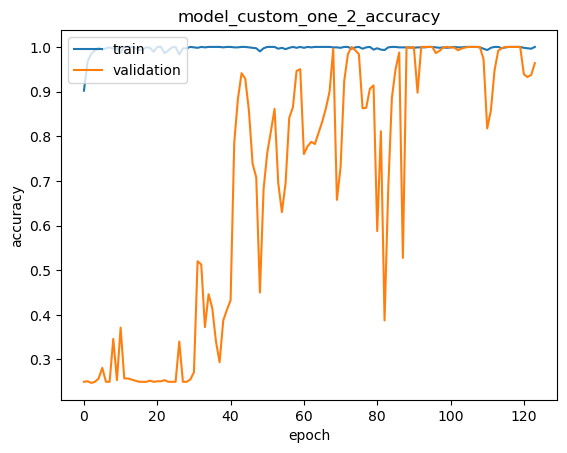

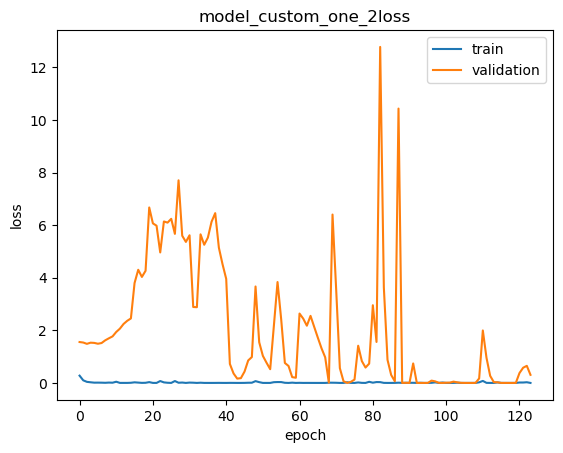

INFO:tensorflow:Assets written to: Trained_Mobile_Custom_One_2_Model\assets


INFO:tensorflow:Assets written to: Trained_Mobile_Custom_One_2_Model\assets


In [12]:
def plot_all(history):
    """
    The plot_all() function takes the history of the trained model
    and create two plots for accuracy and loss of both training and validation.
    The plots are saved as png files

    Args:
        history: The history to use and plot

    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model_custom_one_2_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig("plot_accuracy_mobile_custom_one_2.png")
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model_custom_one_2loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig("plot_loss_mobile_custom_one_2.png")
    plt.show()
    

plot_all(history)
model.save("Trained_Mobile_Custom_One_2_Model")

In [13]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [15]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

Confusion matrix, without normalization
[[149   1   0   0]
 [  0 150   0   0]
 [  0   0 150   0]
 [  0   0   1 149]]


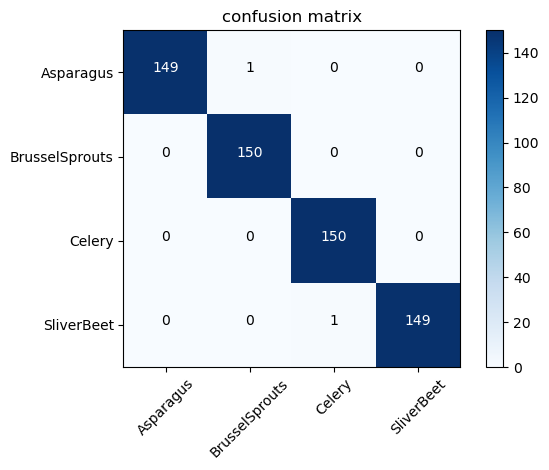

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig("confusion_mobile_custom_one_2.png")
    

cm_plot_labels = ['Asparagus', 'BrusselSprouts', 'Celery', 'SliverBeet']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
